#Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from datetime import datetime, date, timedelta, timezone
from dateutil import tz
from pandas.tseries.holiday import USFederalHolidayCalendar

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima
from pmdarima.utils import tsdisplay

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.5 MB/s eta 0:00:00


#Context

#Dataset

In [ ]:
file1 = 'https://docs.google.com/spreadsheets/d/118lJHrCt3JJ-FeWmyiB7XXkws1hlYqP4QJmauwBG6FQ/edit#gid=1202181395'
file2 = 'https://docs.google.com/spreadsheets/d/1kIvBncm7xw_-6ZdqTQCjzdhYi2OPX46SbffA0IY4pBM/edit#gid=600789195'
file3 = 'https://docs.google.com/spreadsheets/d/1ki4ZfI27YPT0zLp6u6qrpKBjDIrdumsIRKzOfy-us-M/edit#gid=815354684'
file4 = 'https://docs.google.com/spreadsheets/d/10tkZ7YrlauXFel52u7cT5mPAMkYFEelsoMyHzzj_-qU/edit#gid=771164475'

file1_trf = file1.replace('/edit#gid=', '/export?format=csv&gid=')
file2_trf = file2.replace('/edit#gid=', '/export?format=csv&gid=')
file3_trf = file3.replace('/edit#gid=', '/export?format=csv&gid=')
file4_trf = file4.replace('/edit#gid=', '/export?format=csv&gid=')

In [ ]:
ozone_nyc = pd.read_csv(file1_trf)
ozone_nyc.head()

,date,Ozone
0,2000-01-01,0.004032
1,2000-01-02,0.009486
2,2000-01-03,0.005580
3,2000-01-04,0.008717
4,2000-01-05,0.013754


In [ ]:
ozone_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6291 entries, 0 to 6290
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6291 non-null   object 
 1   Ozone   6167 non-null   float64
dtypes: float64(1), object(1)
memory usage: 98.4+ KB


In [ ]:
nyc = pd.read_csv(file2_trf)
nyc.head()

,date,ozone,pm25,co
0,1999-07-01,0.012024,20.000000,1.300687
1,1999-07-02,0.027699,23.900000,0.958194
2,1999-07-03,0.043969,36.700000,1.194444
3,1999-07-04,0.035161,39.000000,1.081548
4,1999-07-05,0.038359,28.171429,0.939583


In [ ]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB


In [ ]:
nyc[['date','pm25']].head()

,date,pm25
0,1999-07-01,20.000000
1,1999-07-02,23.900000
2,1999-07-03,36.700000
3,1999-07-04,39.000000
4,1999-07-05,28.171429


In [ ]:
nyc[['date','pm25']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   pm25    6317 non-null   float64
dtypes: float64(1), object(1)
memory usage: 98.8+ KB


In [ ]:
ozone_nyla = pd.read_csv(file3_trf)
ozone_nyla.head()

,date,Los Angeles,New York
0,2000-01-01,0.008375,0.004032
1,2000-01-02,NaN,0.009486
2,2000-01-03,NaN,0.005580
3,2000-01-04,0.005500,0.008717
4,2000-01-05,0.005000,0.013754


In [ ]:
ozone_nyla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6291 entries, 0 to 6290
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6291 non-null   object 
 1   Los Angeles  5488 non-null   float64
 2   New York     6167 non-null   float64
dtypes: float64(2), object(1)
memory usage: 147.6+ KB


In [ ]:
co_cities = pd.read_csv(file4_trf)
co_cities.head()

,date,Chicago,Los Angeles,New York
0,2005-01-01,0.317763,0.777657,0.639830
1,2005-01-03,0.520833,0.349547,0.969572
2,2005-01-04,0.477083,0.626630,0.905208
3,2005-01-05,0.348822,0.613814,0.769176
4,2005-01-06,0.572917,0.792597,0.815761


In [ ]:
co_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1898 non-null   object 
 1   Chicago      1898 non-null   float64
 2   Los Angeles  1898 non-null   float64
 3   New York     1898 non-null   float64
dtypes: float64(3), object(1)
memory usage: 59.4+ KB


#Data Cleaning - Use only nyc

##Check null

In [ ]:
null_check = nyc.copy()
null_check.isna().sum()
#No null

date     0
ozone    0
pm25     0
co       0
dtype: int64

##Check data type

In [ ]:
data_type = null_check.copy()
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB


In [ ]:
data_type['date'] = pd.to_datetime(data_type['date'])

In [ ]:
data_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6317 non-null   datetime64[ns]
 1   ozone   6317 non-null   float64       
 2   pm25    6317 non-null   float64       
 3   co      6317 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 197.5 KB


##Check typo

In [ ]:
typo_check = data_type.copy()
typo_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6317 non-null   datetime64[ns]
 1   ozone   6317 non-null   float64       
 2   pm25    6317 non-null   float64       
 3   co      6317 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 197.5 KB


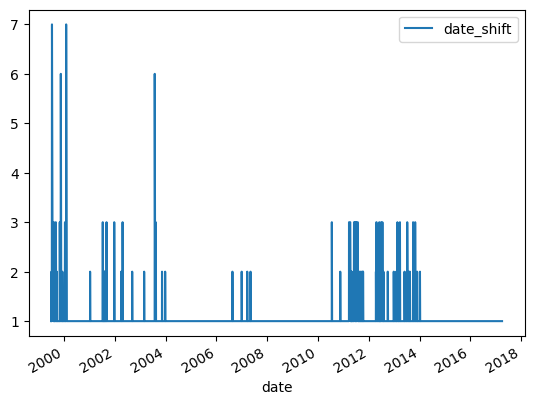

In [ ]:
typo_check['date_shift'] = (typo_check['date'].shift(-1) - typo_check['date']).dt.days

plot = typo_check.plot(x='date', y='date_shift', kind='line')
plt.show()

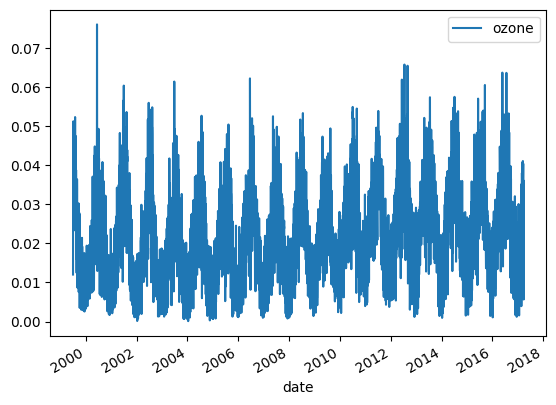

In [ ]:
plot = typo_check.plot(x='date', y='ozone', kind='line')
plt.show()

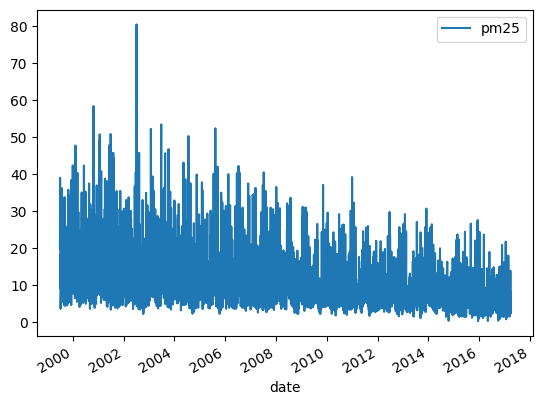

In [ ]:
plot = typo_check.plot(x='date', y='pm25', kind='line')
plt.show()

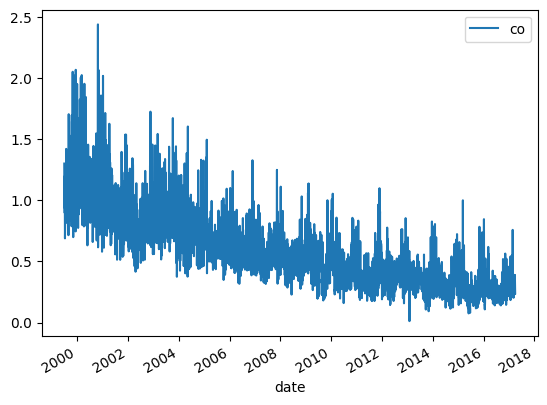

In [ ]:
plot = typo_check.plot(x='date', y='co', kind='line')
plt.show()

In [ ]:
typo_check.drop(columns='date_shift', inplace=True)

##Feature Engineering

In [ ]:
#weekdays
feature_eng = typo_check.copy()
feature_eng['weekday_name'] = feature_eng['date'].dt.day_name()
feature_eng.head(10)

,date,ozone,pm25,co,weekday_name
0,1999-07-01,0.012024,20.000000,1.300687,Thursday
1,1999-07-02,0.027699,23.900000,0.958194,Friday
2,1999-07-03,0.043969,36.700000,1.194444,Saturday
3,1999-07-04,0.035161,39.000000,1.081548,Sunday
4,1999-07-05,0.038359,28.171429,0.939583,Monday
5,1999-07-06,0.051271,31.800000,1.066146,Tuesday
6,1999-07-08,0.029166,9.083333,0.896572,Thursday
7,1999-07-09,0.038955,18.300000,1.045126,Friday
8,1999-07-10,0.034542,17.600000,0.908036,Saturday
9,1999-07-11,0.023297,3.600000,0.688690,Sunday


In [ ]:
#isHoliday
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='1999-01-01', end='2018-12-31').to_pydatetime()

feature_eng['isHoliday'] = np.where(feature_eng['date'].isin(holidays), 1, 0)

#isWeekend
feature_eng['isWeekend'] = np.where(feature_eng['weekday_name'].isin(['Saturday','Sunday']), 1, 0)

#isHolidayWeekend
feature_eng['isHolidayWeekend'] = np.where((feature_eng['isHoliday']==1) | (feature_eng['isWeekend']==1), 1, 0)

#OneHotEncoder: weekday_name
feature_eng = pd.get_dummies(data = feature_eng, columns=['weekday_name'], prefix='', prefix_sep='')

feature_eng.head(10)

,date,ozone,pm25,co,isHoliday,isWeekend,isHolidayWeekend,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1999-07-01,0.012024,20.000000,1.300687,0,0,0,0,0,0,0,1,0,0
1,1999-07-02,0.027699,23.900000,0.958194,0,0,0,1,0,0,0,0,0,0
2,1999-07-03,0.043969,36.700000,1.194444,0,1,1,0,0,1,0,0,0,0
3,1999-07-04,0.035161,39.000000,1.081548,0,1,1,0,0,0,1,0,0,0
4,1999-07-05,0.038359,28.171429,0.939583,1,0,1,0,1,0,0,0,0,0
5,1999-07-06,0.051271,31.800000,1.066146,0,0,0,0,0,0,0,0,1,0
6,1999-07-08,0.029166,9.083333,0.896572,0,0,0,0,0,0,0,1,0,0
7,1999-07-09,0.038955,18.300000,1.045126,0,0,0,1,0,0,0,0,0,0
8,1999-07-10,0.034542,17.600000,0.908036,0,1,1,0,0,1,0,0,0,0
9,1999-07-11,0.023297,3.600000,0.688690,0,1,1,0,0,0,1,0,0,0


In [ ]:
feature_eng.columns

Index(['date', 'ozone', 'pm25', 'co', 'isHoliday', 'isWeekend',
       'isHolidayWeekend', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [ ]:
#Feature selection
feature_sel = feature_eng.copy()
feature_sel.drop(columns='date', inplace=True)
feature_sel.reset_index(inplace=True)

X = feature_sel[['index', 'isHoliday', 'isWeekend',
       'isHolidayWeekend', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday']]
y = feature_sel[['pm25']]

anova_selector = SelectKBest(f_classif, k='all')
anova_selector.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k='all')

In [ ]:
names = X.columns.values[anova_selector.get_support()]
scores = anova_selector.scores_
names_scores = list(zip(names,scores))
score_table = pd.DataFrame(data=names_scores, columns=['feature_names', 'F-score'])\
              .sort_values('F-score', ascending=False)

score_table

,feature_names,F-score
0,index,2.390937
6,Saturday,1.042548
9,Tuesday,1.037843
8,Thursday,1.018561
4,Friday,1.015060
10,Wednesday,1.012558
2,isWeekend,0.992594
3,isHolidayWeekend,0.992054
5,Monday,0.982861
1,isHoliday,0.957922


#Exploratory Data Analysis (in Tableau

##Plot Daily

In [ ]:
eda_daily = feature_eng.copy().set_index('date')
eda_daily.head()

,ozone,pm25,co,isHoliday,isWeekend,isHolidayWeekend,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
date,,,,,,,,,,,,,
1999-07-01,0.012024,20.000000,1.300687,0,0,0,0,0,0,0,1,0,0
1999-07-02,0.027699,23.900000,0.958194,0,0,0,1,0,0,0,0,0,0
1999-07-03,0.043969,36.700000,1.194444,0,1,1,0,0,1,0,0,0,0
1999-07-04,0.035161,39.000000,1.081548,0,1,1,0,0,0,1,0,0,0
1999-07-05,0.038359,28.171429,0.939583,1,0,1,0,1,0,0,0,0,0


In [ ]:
eda_daily.to_excel('nyc_mod.xlsx')

#Forecasting using ARIMA

##Daily

In [ ]:
forecast_data = feature_eng.copy().set_index('date')
forecast_data.head()

,ozone,pm25,co,isHoliday,isWeekend,isHolidayWeekend,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
date,,,,,,,,,,,,,
1999-07-01,0.012024,20.000000,1.300687,0,0,0,0,0,0,0,1,0,0
1999-07-02,0.027699,23.900000,0.958194,0,0,0,1,0,0,0,0,0,0
1999-07-03,0.043969,36.700000,1.194444,0,1,1,0,0,1,0,0,0,0
1999-07-04,0.035161,39.000000,1.081548,0,1,1,0,0,0,1,0,0,0
1999-07-05,0.038359,28.171429,0.939583,1,0,1,0,1,0,0,0,0,0


In [ ]:
forecast_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ozone             6317 non-null   float64
 1   pm25              6317 non-null   float64
 2   co                6317 non-null   float64
 3   isHoliday         6317 non-null   int64  
 4   isWeekend         6317 non-null   int64  
 5   isHolidayWeekend  6317 non-null   int64  
 6   Friday            6317 non-null   uint8  
 7   Monday            6317 non-null   uint8  
 8   Saturday          6317 non-null   uint8  
 9   Sunday            6317 non-null   uint8  
 10  Thursday          6317 non-null   uint8  
 11  Tuesday           6317 non-null   uint8  
 12  Wednesday         6317 non-null   uint8  
dtypes: float64(3), int64(3), uint8(7)
memory usage: 388.6 KB


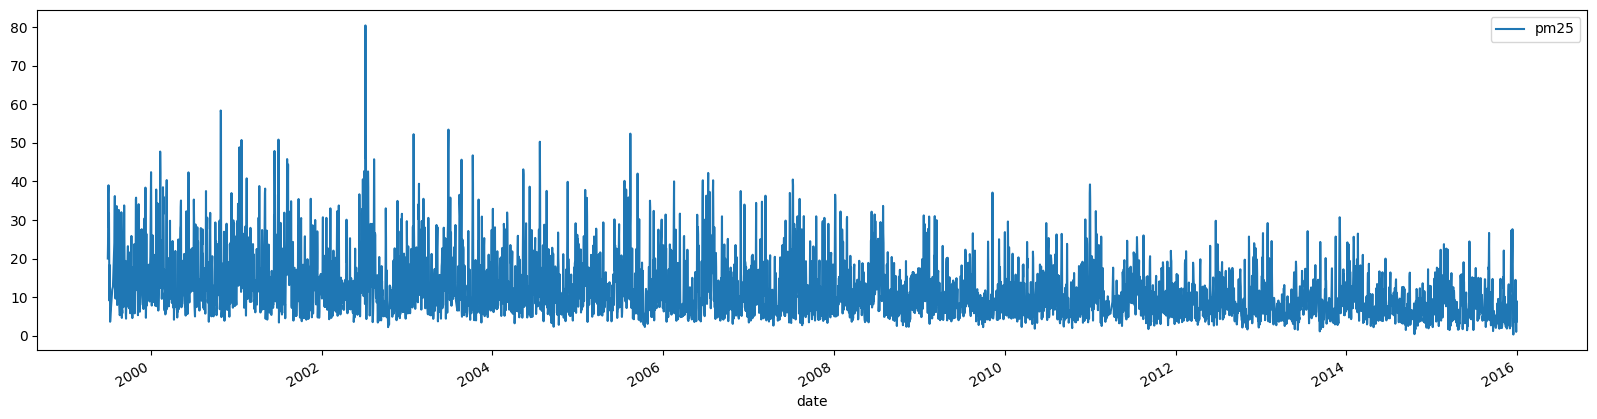

In [ ]:
y_train, y_test = forecast_data[['pm25']].loc[:'2015'], forecast_data[['pm25']].loc['2015':]

fig, ax = plt.subplots(figsize=(20,5))
y_train.plot(ax=ax)
plt.show()

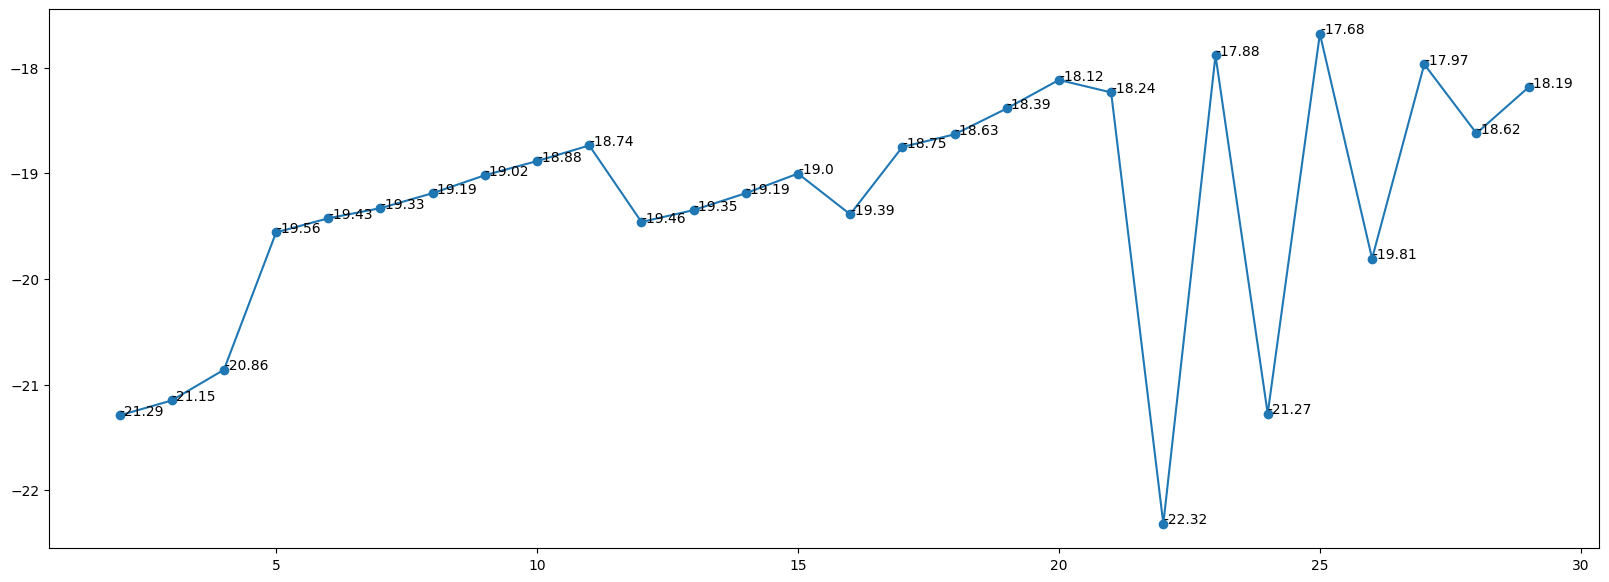

In [ ]:
#Determine seasonality
di = {}

for i in range(2, 30, 1):
  acf_data = y_train.copy()
  acf_data = acf_data - acf_data.rolling(i).mean()
  acf_data.dropna(inplace=True)

  try:
    result = adfuller(acf_data)
    di[i] = result[0].round(10)
  except:
    break

fig, ax = plt.subplots(figsize=(20,7))
plt.plot(di.keys(), di.values(), marker='o')
for i,v in di.items():
  plt.text(i, v, round(v,2))
plt.show()

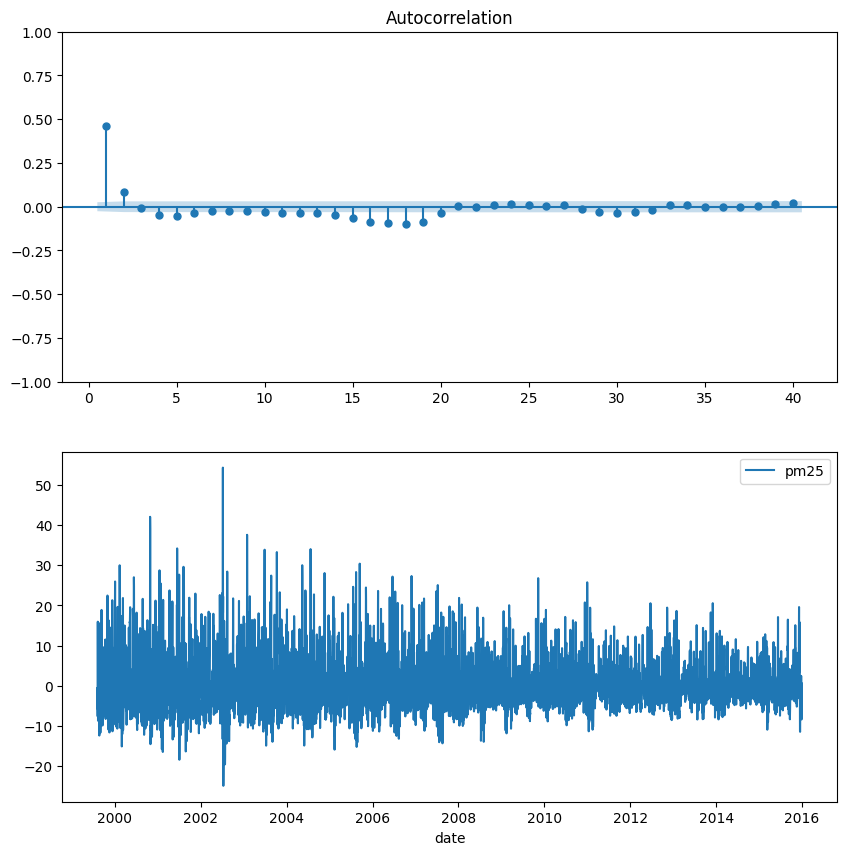

In [ ]:
acf_data = y_train.copy()
acf_data = acf_data - acf_data.rolling(20).mean()
acf_data.dropna(inplace=True)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
plot_acf(acf_data, lags=40, zero=False, ax=ax[0])
sns.lineplot(acf_data, ax=ax[1])
plt.show()
fig.savefig('autocorrelation_daily.png', format='png', bbox_inches='tight', dpi=200)

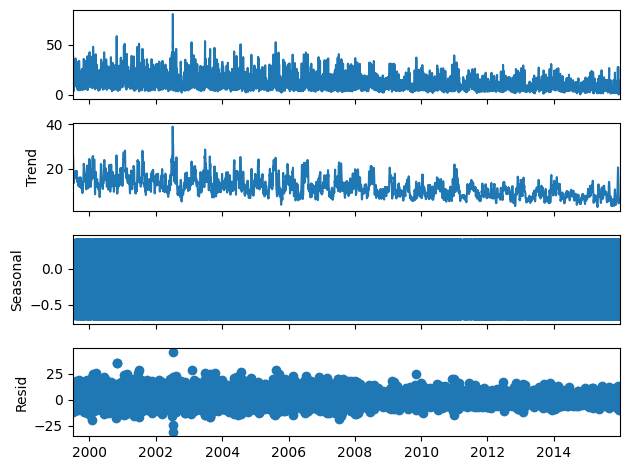

In [ ]:
decomp_results = seasonal_decompose(y_train, period=9)
decomp_results.plot()
plt.show()

Seasonality period : no seasonality

In [ ]:
model = auto_arima(y_train, trace=True, suppress_warnings=True, max_p=20, max_d=20,
                   max_q=20)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=37878.663, Time=9.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=39661.748, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=39535.671, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=39247.271, Time=1.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=39659.749, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=37876.685, Time=5.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=37927.061, Time=2.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.96 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=37878.671, Time=7.92 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=37879.708, Time=3.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=37892.444, Time=5.90 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=37880.586, Time=5.40 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=37874.844, Time=1.16 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=37925.171, Time=0.67 sec
 ARIMA(1,1,1)(0,0,0)[0]  

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5861
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -18933.422
Date:                Mon, 28 Aug 2023   AIC                          37874.844
Time:                        08:46:36   BIC                          37901.548
Sample:                             0   HQIC                         37884.129
                               - 5861                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2053      0.020     10.306      0.000       0.166       0.244
ma.L1         -0.6196      0.019    -32.016      0.000      -0.657      -0.582
ma.L2         -0.3377      0.018    -18.994      0.000      -0.373      -0.303
sigma2        37.4746      0.451     83.123      0.000      36.591      38.358
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2954.84
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                             0.93
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Using ARIMA (1,1,2)

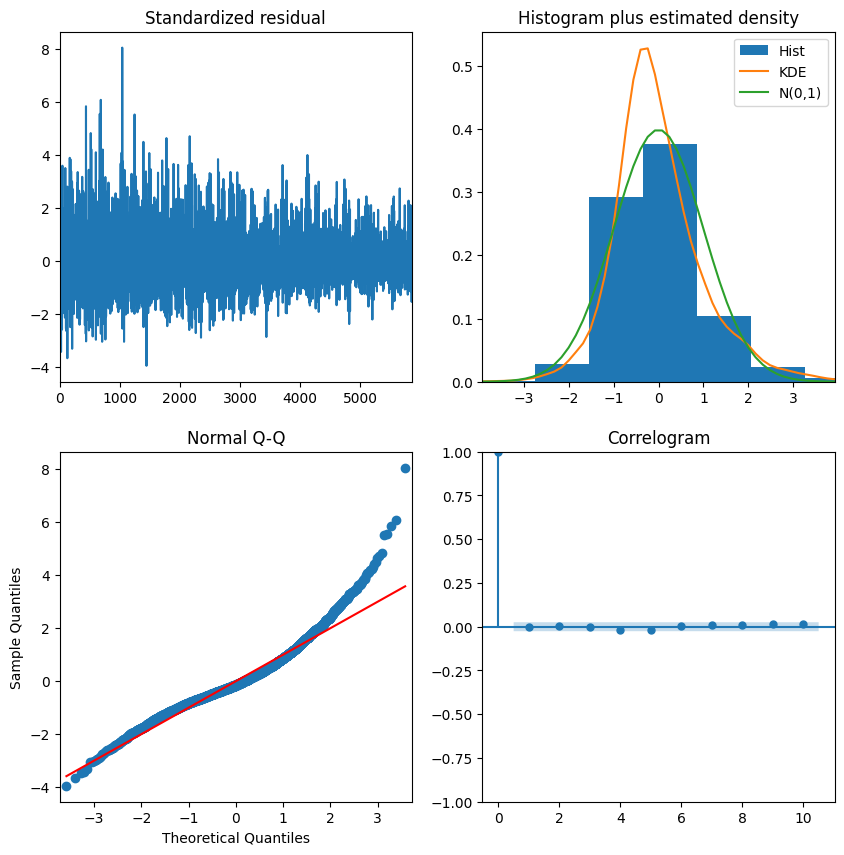

In [ ]:
model.plot_diagnostics(figsize=(10,10))
plt.show()

In [ ]:
y_train.shape[0]

5861

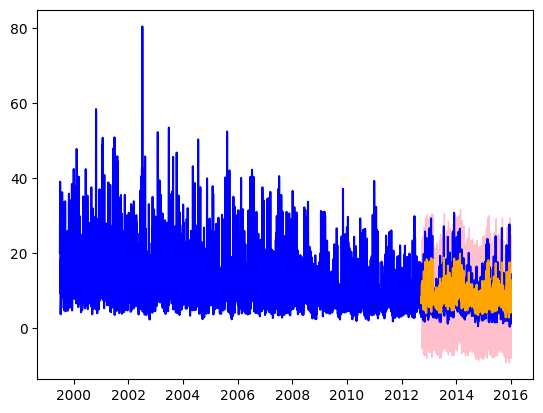

In [ ]:
fig, ax = plt.subplots()

insample, conf_int = model.predict_in_sample(start=round(y_train.shape[0]*0.8), return_conf_int=True, alpha=0.05)

insample = insample.reset_index()
conf_int = pd.DataFrame(conf_int, columns=[1,2])
insample = pd.concat([insample, conf_int], axis=1).set_index('date')

ax.plot(y_train, c='blue')
ax.plot(insample[0], c='orange')
ax.fill_between(insample.index, insample[1], insample[2], color='pink')

plt.show()

In [ ]:
print("RMSE: %.3f" % np.sqrt(mean_squared_error(y_train.iloc[4689:], insample[0])))

RMSE: 4.214


In [ ]:
y_pred, conf_int = model.predict(n_periods = y_test.shape[0], return_conf_int=True, alpha=0.05)

# Print the error:
print("RMSE: %.3f" % np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 4.620


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


##Weekly

In [ ]:
forecast_weekly = feature_eng.copy()
forecast_weekly['week'] = forecast_weekly['date'].dt.to_period('W')
forecast_weekly = forecast_weekly.groupby('week')[['pm25']].mean()
forecast_weekly

,pm25
week,
1999-06-28/1999-07-04,29.900000
1999-07-05/1999-07-11,18.092460
1999-07-12/1999-07-18,5.900000
1999-07-19/1999-07-25,12.275000
1999-07-26/1999-08-01,25.092143
...,...
2017-02-27/2017-03-05,4.857961
2017-03-06/2017-03-12,3.642534
2017-03-13/2017-03-19,3.783780


In [ ]:
forecast_weekly.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 927 entries, 1999-06-28/1999-07-04 to 2017-03-27/2017-04-02
Freq: W-SUN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm25    927 non-null    float64
dtypes: float64(1)
memory usage: 14.5 KB


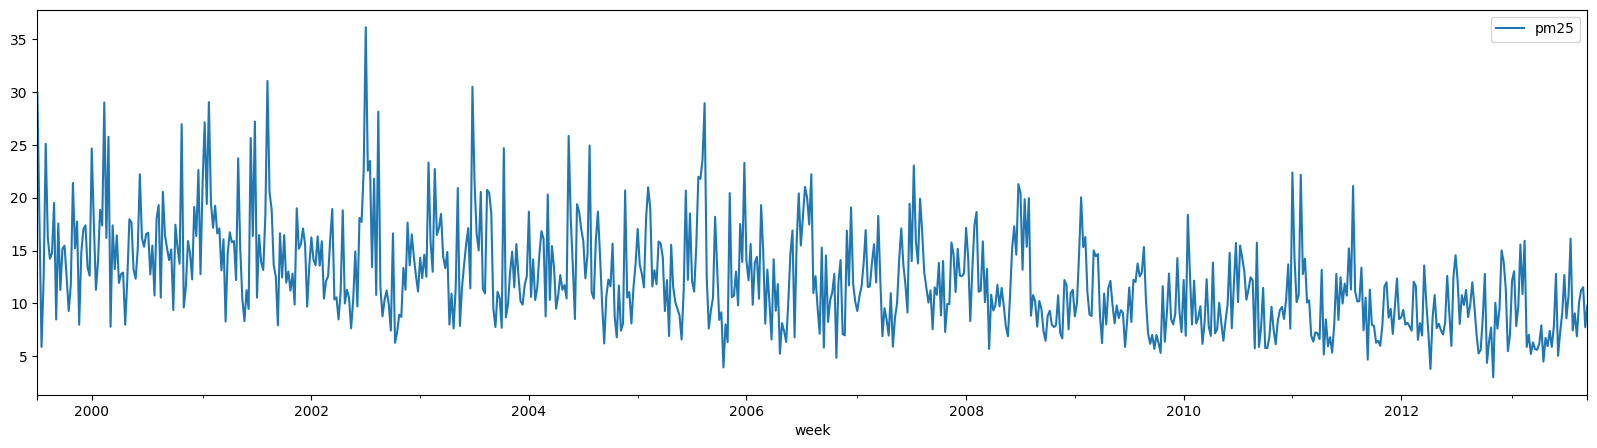

In [ ]:
y_train, y_test = forecast_weekly[['pm25']].iloc[:round(forecast_weekly.shape[0]*0.8)], forecast_weekly[['pm25']].iloc[round(forecast_weekly.shape[0]*0.8):]

fig, ax = plt.subplots(figsize=(20,5))
y_train.plot(ax=ax)
plt.show()

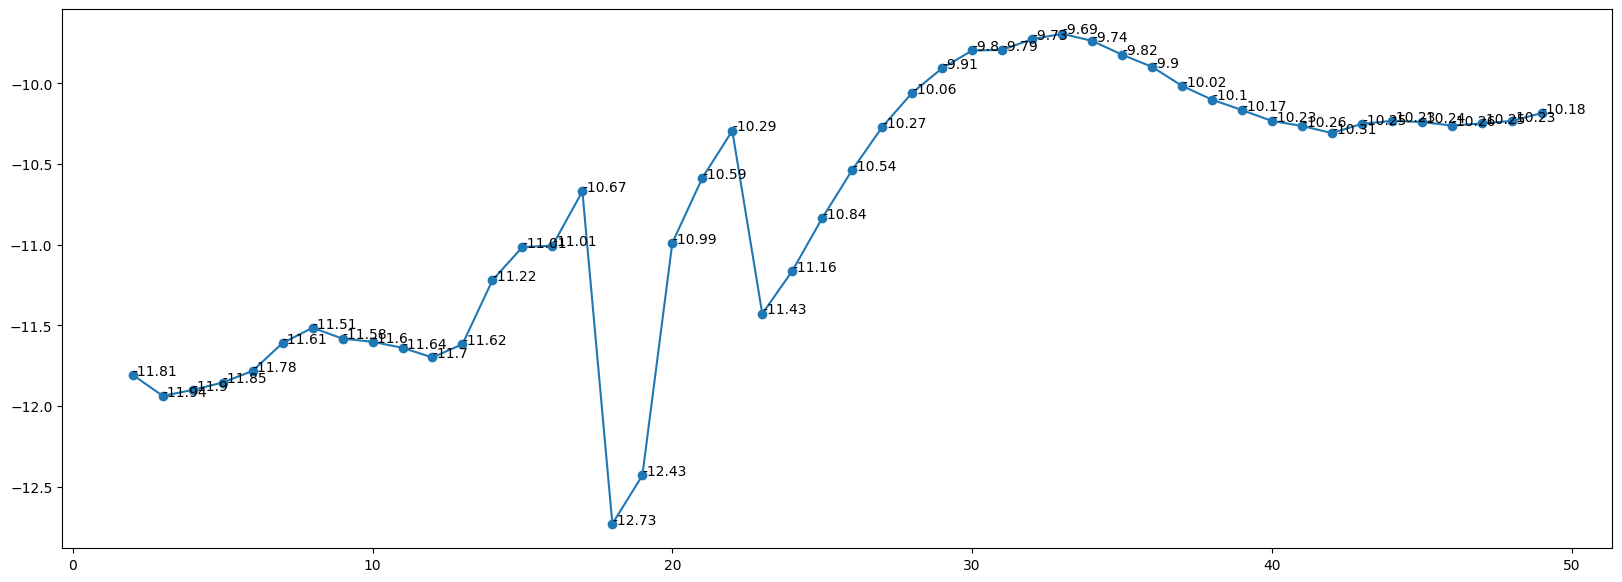

In [ ]:
#Determine seasonality
di = {}

for i in range(2, 50, 1):
  acf_data = y_train.copy()
  acf_data = acf_data - acf_data.rolling(i).mean()
  acf_data.dropna(inplace=True)

  try:
    result = adfuller(acf_data)
    di[i] = result[0].round(10)
  except:
    break

fig, ax = plt.subplots(figsize=(20,7))
plt.plot(di.keys(), di.values(), marker='o')
for i,v in di.items():
  plt.text(i, v, round(v,2))
plt.show()

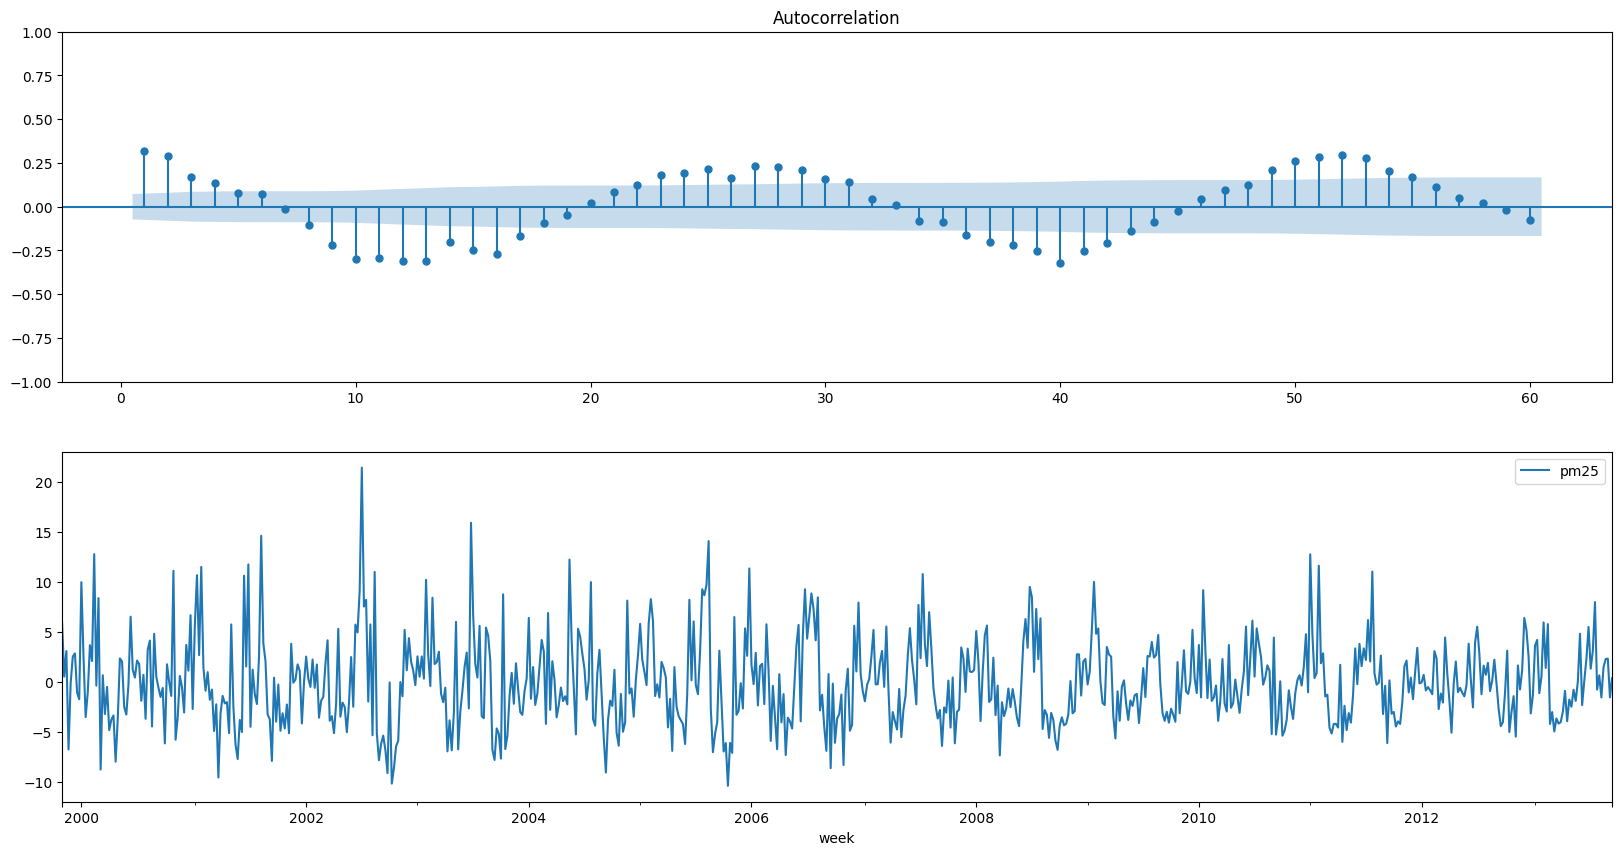

In [ ]:
acf_data = y_train.copy()
acf_data = acf_data - acf_data.rolling(18).mean()
acf_data.dropna(inplace=True)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,10))
plot_acf(acf_data, lags=60, zero=False, ax=ax[0])
acf_data.plot(ax=ax[1])
plt.show()
fig.savefig('autocorrelation_weekly.png', format='png', bbox_inches='tight', dpi=200)

Seasonality period : around 12 week or 13 week

In [ ]:
seasonality_periods = [12,13]
best_model = None
best_aic = float("inf")
for period in seasonality_periods:
    model = auto_arima(y_train,
                       seasonal=True,
                       m=period,
                       stepwise=True,
                       suppress_warnings=True,
                       error_action="ignore",
                       trace=True
    )

    if model.aic() < best_aic:
        best_aic = model.aic()
        best_model = model

# Fit the best model
best_model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=7.68 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4563.023, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4372.809, Time=0.46 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=2.58 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4561.043, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4372.672, Time=0.12 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4372.852, Time=0.72 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4374.738, Time=2.12 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=4333.662, Time=0.59 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=4333.425, Time=0.96 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=4335.390, Time=2.43 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=4335.382, Time=2.42 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=4333.460, Time=0.76 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=4337.382, Time=7.85 sec
 ARIMA(3,1,0)(1,0,0)[12] inte

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

Using ARIMA (1,1,2)

In [ ]:
y_train.shape[0]

742

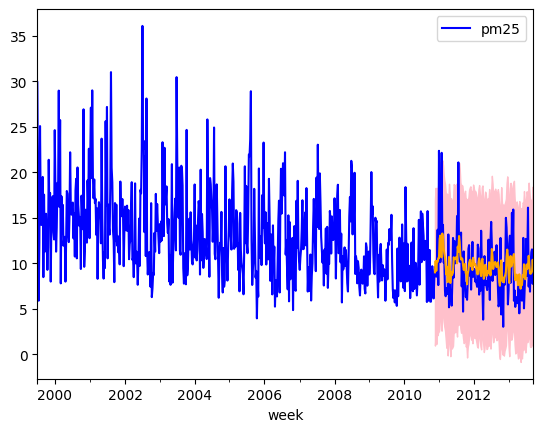

In [ ]:
fig, ax = plt.subplots()

insample, conf_int = model.predict_in_sample(start=round(y_train.shape[0]*0.8), return_conf_int=True, alpha=0.05)

insample = insample.reset_index()
conf_int = pd.DataFrame(conf_int, columns=[1,2])
insample = pd.concat([insample, conf_int], axis=1).set_index('week')

y_train.plot(c='blue', ax=ax)
ax.plot(insample[0], c='orange')
ax.fill_between(insample.index, insample[1], insample[2], color='pink')

plt.show()

In [ ]:
print("RMSE: %.3f" % np.sqrt(mean_squared_error(y_train.iloc[round(y_train.shape[0]*0.8):], insample[0])))

RMSE: 3.095


In [ ]:
y_pred, conf_int = model.predict(n_periods = y_test.shape[0], return_conf_int=True, alpha=0.05)

# Print the error:
print("RMSE: %.3f" % np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 3.274


##Month

In [ ]:
forecast_monthly = feature_eng.copy()
forecast_monthly['month'] = forecast_monthly['date'].dt.to_period('M')
forecast_monthly['month'] = pd.to_datetime(forecast_monthly['month'].astype('str'))
forecast_monthly = forecast_monthly.groupby('month')[['pm25']].mean()
forecast_monthly

,pm25
month,
1999-07-01,21.102798
1999-08-01,15.708251
1999-09-01,13.623622
1999-10-01,13.941566
1999-11-01,14.614816
...,...
2016-11-01,6.818088
2016-12-01,6.803212
2017-01-01,6.881950


In [ ]:
forecast_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 213 entries, 1999-07-01 to 2017-03-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm25    213 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


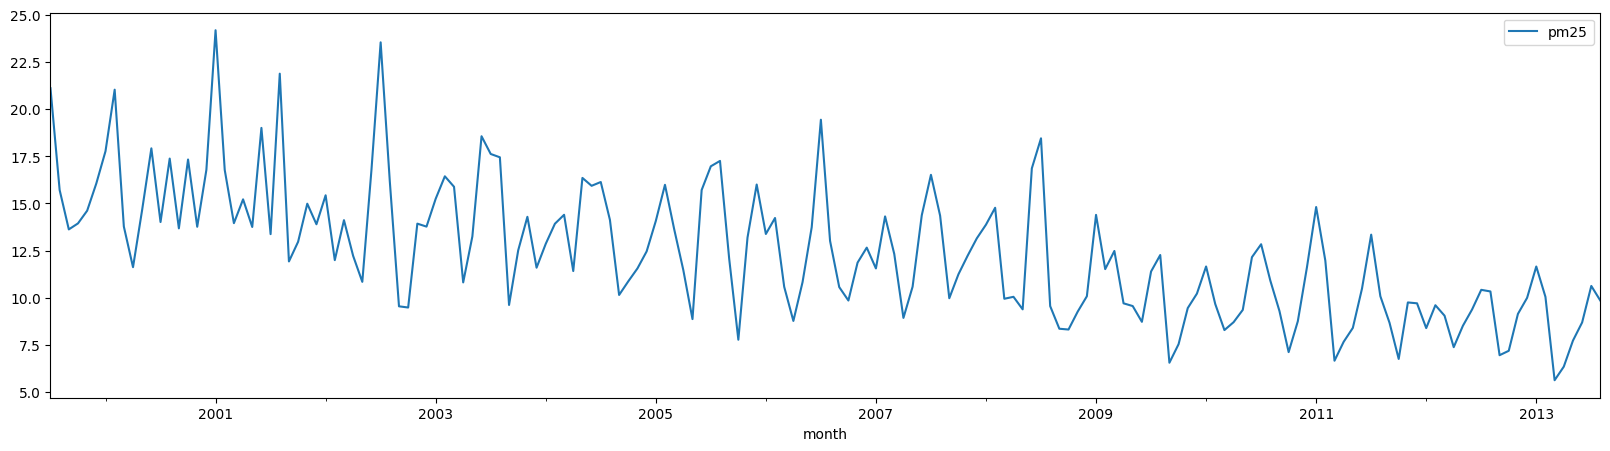

In [ ]:
boundary = round(forecast_monthly.shape[0]*0.8)
y_train, y_test = forecast_monthly[['pm25']].iloc[:boundary], forecast_monthly[['pm25']].iloc[boundary:]

fig, ax = plt.subplots(figsize=(20,5))
y_train.plot(ax=ax)
plt.show()

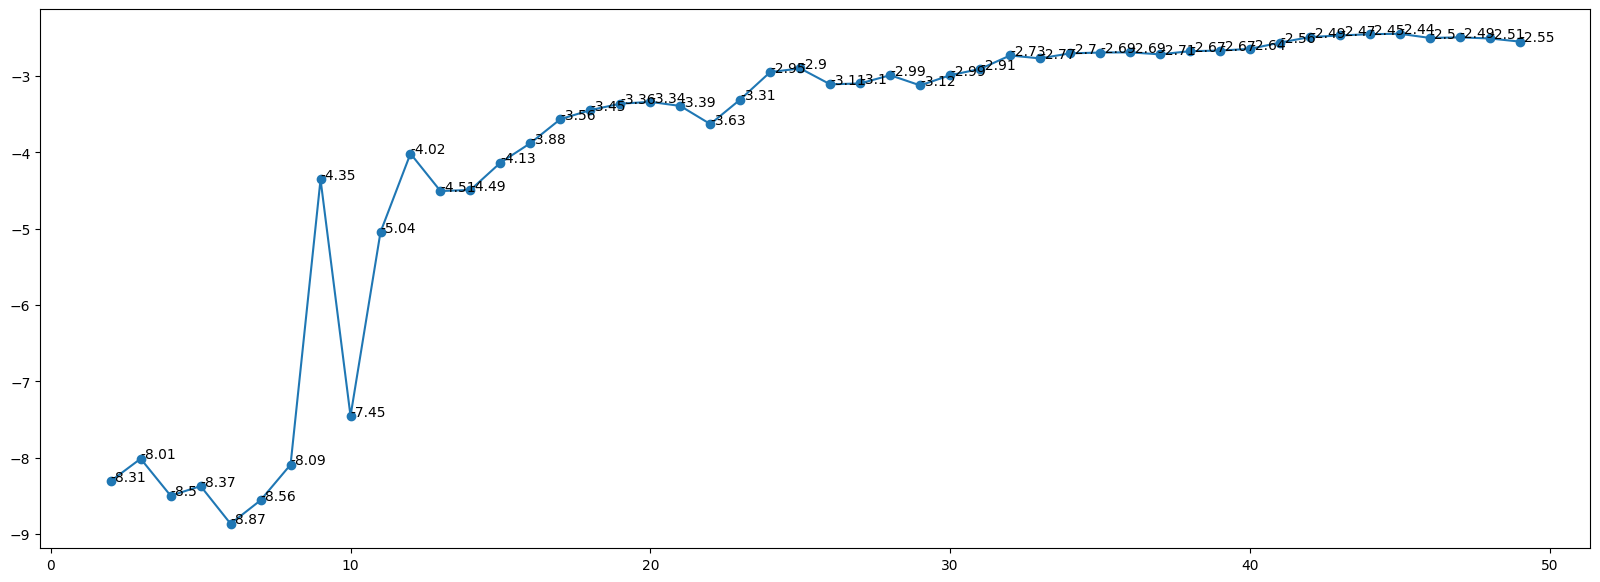

In [ ]:
#Determine seasonality
di = {}

for i in range(2, 50, 1):
  acf_data = y_train.copy()
  acf_data = acf_data - acf_data.rolling(i).mean()
  acf_data.dropna(inplace=True)

  try:
    result = adfuller(acf_data)
    di[i] = result[0].round(10)
  except:
    break

fig, ax = plt.subplots(figsize=(20,7))
plt.plot(di.keys(), di.values(), marker='o')
for i,v in di.items():
  plt.text(i, v, round(v,2))
plt.show()

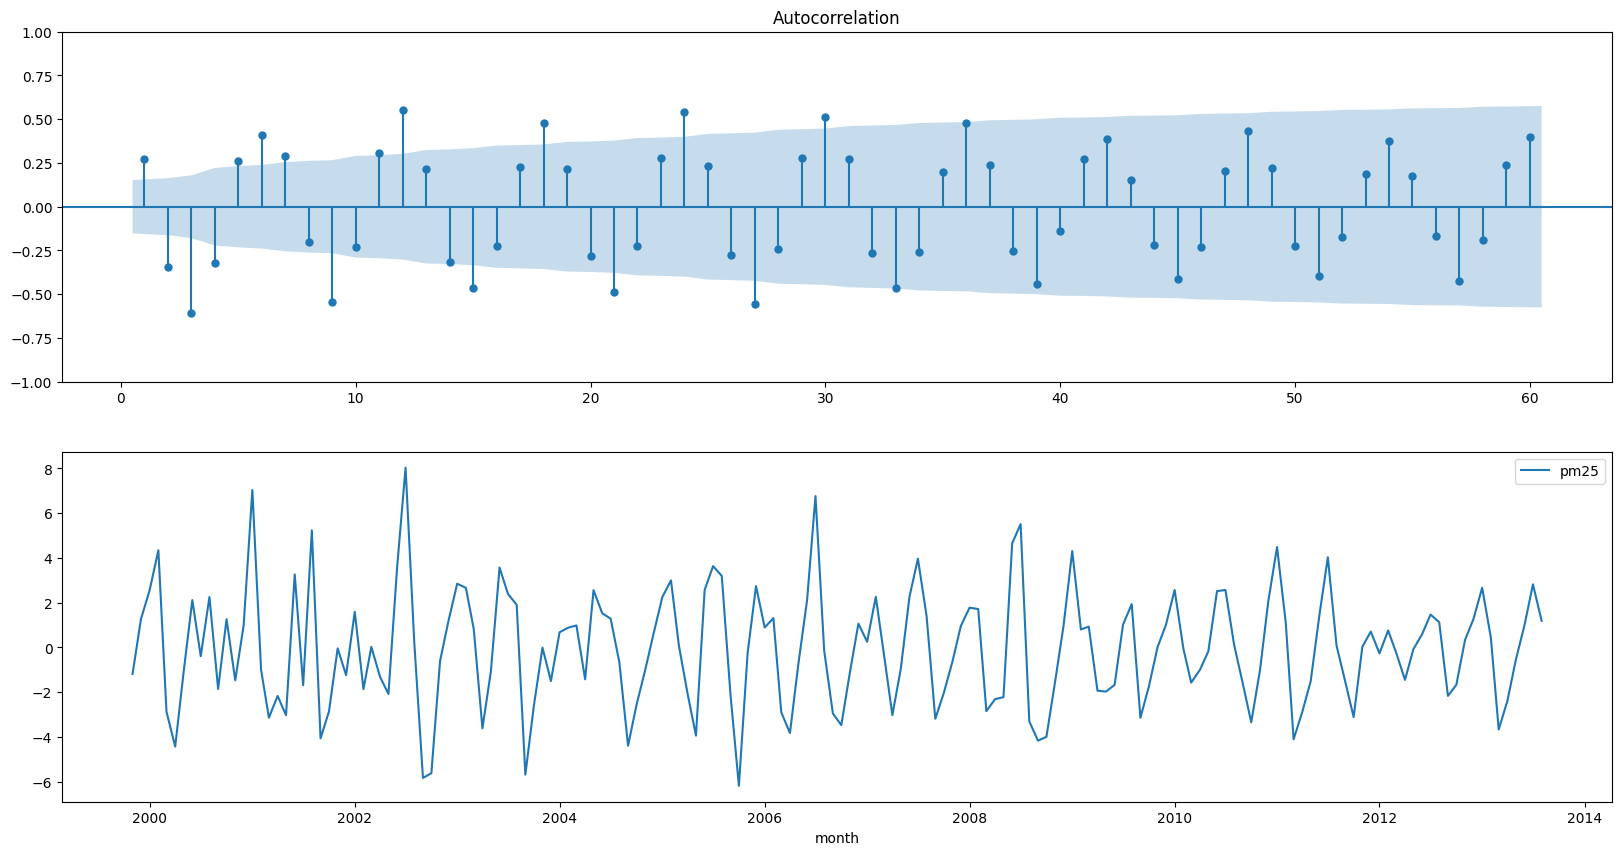

In [ ]:
acf_data = y_train.copy()
acf_data = acf_data - acf_data.rolling(5).mean()
acf_data.dropna(inplace=True)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,10))
plot_acf(acf_data, lags=60, zero=False, ax=ax[0])
sns.lineplot(acf_data, ax=ax[1])
plt.show()
fig.savefig('autocorrelation_monthly.png', format='png', bbox_inches='tight', dpi=200)

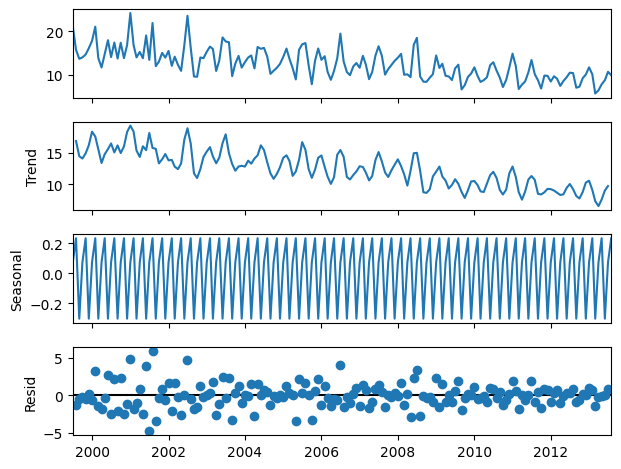

In [ ]:
decomp_results = seasonal_decompose(y_train, period=3)
decomp_results.plot()
plt.show()

Seasonality period : no seasonality

In [ ]:
model = auto_arima(y_train, trace=True, suppress_warnings=True, max_p=20, max_d=20,
                   max_q=20, seasonal=True, m=3)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[3] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[3] intercept   : AIC=879.923, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[3] intercept   : AIC=856.858, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[3] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[3]             : AIC=877.994, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[3] intercept   : AIC=878.277, Time=0.07 sec
 ARIMA(1,1,0)(2,0,0)[3] intercept   : AIC=858.395, Time=0.15 sec
 ARIMA(1,1,0)(1,0,1)[3] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(1,1,0)(0,0,1)[3] intercept   : AIC=855.038, Time=0.14 sec
 ARIMA(1,1,0)(0,0,2)[3] intercept   : AIC=856.905, Time=0.40 sec
 ARIMA(1,1,0)(1,0,2)[3] intercept   : AIC=inf, Time=1.75 sec
 ARIMA(0,1,0)(0,0,1)[3] intercept   : AIC=866.474, Time=0.07 sec
 ARIMA(2,1,0)(0,0,1)[3] intercept   : AIC=805.920, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[3] intercept   : AIC=867.001, Time=0.10 sec
 ARIMA(2,1,0)(1,0,1)[3] intercept   : AIC=782.969, Time=0.44 se

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  170
Model:             SARIMAX(2, 1, 0)x(1, 0, [1], 3)   Log Likelihood                -385.484
Date:                             Mon, 28 Aug 2023   AIC                            782.969
Time:                                     15:11:32   BIC                            801.748
Sample:                                 07-01-1999   HQIC                           790.590
                                      - 08-01-2013                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1998      0.027     -7.319      0.000      -0.253      -0.146
ar.L1         -0.9414      0.053    -17.713      0.000      -1.046      -0.837
ar.L2         -0.9549      0.051    -18.901      0.000      -1.054      -0.856
ar.S.L3       -0.4437      0.074     -5.985      0.000      -0.589      -0.298
ma.S.L3       -0.9367      0.078    -12.083      0.000      -1.089      -0.785
sigma2         5.4476      0.477     11.416      0.000       4.512       6.383
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                38.22
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             0.80
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Using SARIMA (2,1,0)(1,0,1)3

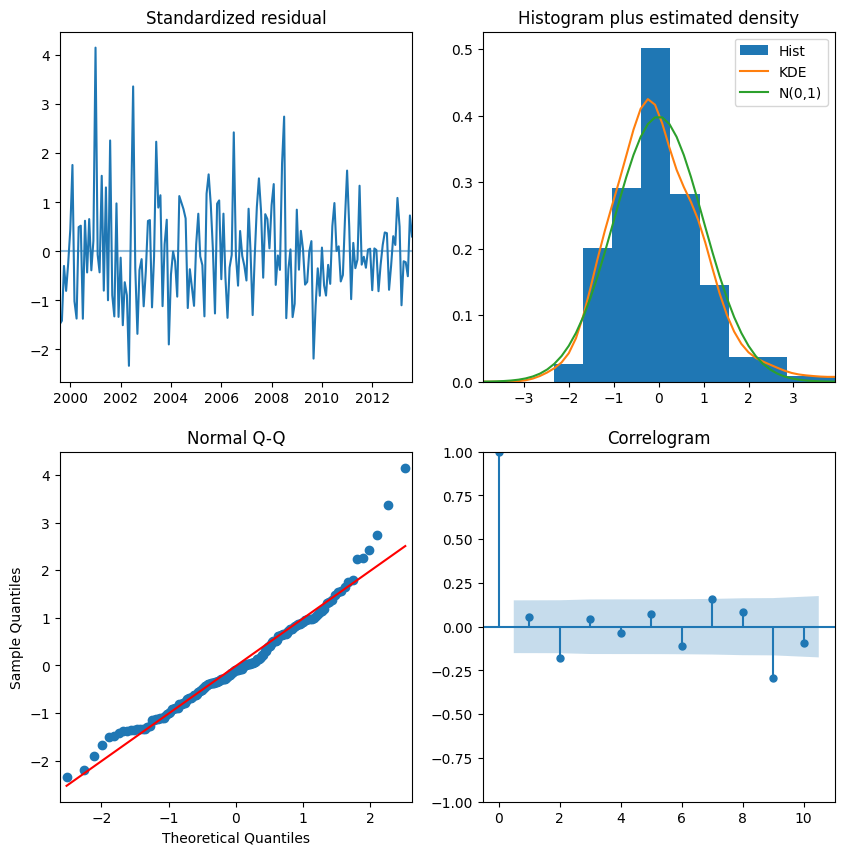

In [ ]:
model.plot_diagnostics(figsize=(10,10))
plt.show()

In [ ]:
y_train.shape[0]

170

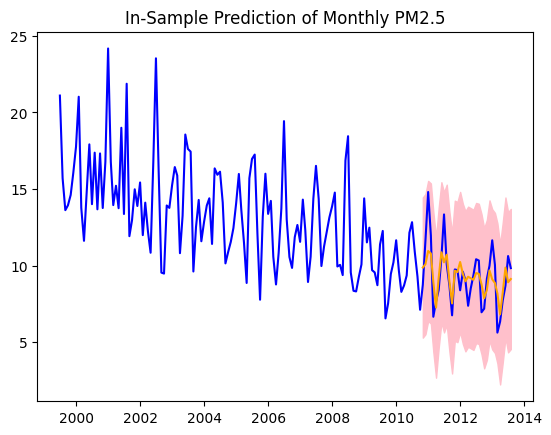

In [ ]:
fig, ax = plt.subplots()

insample, conf_int = model.predict_in_sample(start=round(y_train.shape[0]*0.8), return_conf_int=True, alpha=0.05)

insample = insample.reset_index()
conf_int = pd.DataFrame(conf_int, columns=[1,2])
insample = pd.concat([insample, conf_int], axis=1).set_index('index')

ax.plot(y_train, c='blue')
ax.plot(insample[0], c='orange')
ax.fill_between(insample.index, insample[1], insample[2], color='pink')
ax.set_title('In-Sample Prediction of Monthly PM2.5')
plt.show()
fig.savefig('insample_monthly.png', format='png', bbox_inches='tight', dpi=200)

In [ ]:
print("RMSE: %.3f" % np.sqrt(mean_squared_error(y_train.iloc[round(y_train.shape[0]*0.8):], insample[0])))

RMSE: 1.436


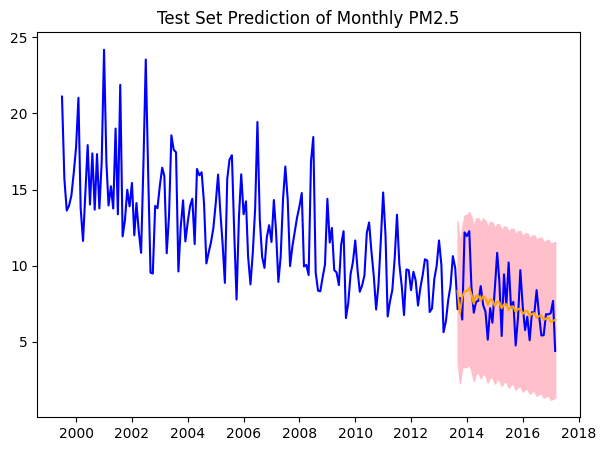

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))

y_pred, conf_int = model.predict(n_periods = y_test.shape[0], return_conf_int=True, alpha=0.05)

forecast = y_pred.reset_index().rename(columns={'index':'month'})
conf_int = pd.DataFrame(conf_int, columns=[1,2])
forecast = pd.concat([forecast, conf_int], axis=1).set_index('month')

ax.plot(forecast_monthly, c='blue')
ax.plot(forecast[0], c='orange')
ax.fill_between(forecast.index, forecast[1], forecast[2], color='pink')
ax.set_title('Test Set Prediction of Monthly PM2.5')
plt.show()
fig.savefig('test_set_monthly.png', format='png', bbox_inches='tight', dpi=200)

In [ ]:
# Print the error:
print("RMSE: %.3f" % np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 1.644


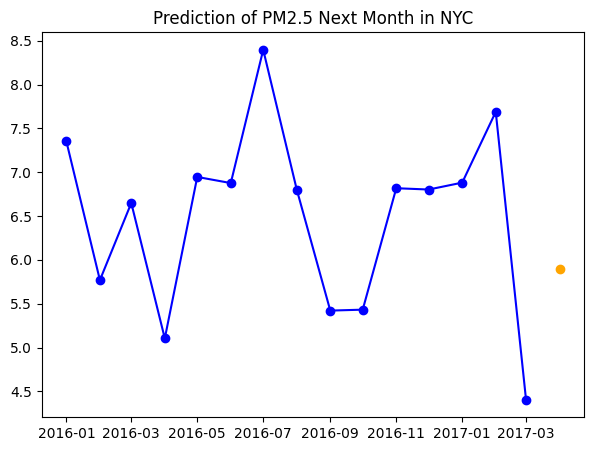

                   0         1          2
month                                    
2017-04-01  5.892611  1.602759  10.182462


In [ ]:
model.fit(forecast_monthly)
y_pred, conf_int = model.predict(n_periods = 1, return_conf_int=True, alpha=0.05)

forecast = y_pred.reset_index().rename(columns={'index':'month'})
conf_int = pd.DataFrame(conf_int, columns=[1,2])
forecast = pd.concat([forecast, conf_int], axis=1).set_index('month')

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(forecast_monthly.loc['2016':], c='blue', marker='o')
ax.plot(forecast[0], c='orange', marker='o')
# ax.fill_between(forecast.index, forecast[1], forecast[2], color='pink')
ax.set_title('Prediction of PM2.5 Next Month in NYC')
plt.show()
fig.savefig('next_month_prediction.png', format='png', bbox_inches='tight', dpi=200)
print(forecast)